## Import liberary

In [2]:
# Import the necessary libraries
import sys
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

# Add the src folder to the path
sys.path.append(os.path.abspath('../..'))
warnings.filterwarnings("ignore", category=FutureWarning)

# Import the classes
from src.data_tool.data_providers.connect_wrds import get_wrds_data, get_security_daily
from src.data_tool.data_providers.yahoo_finance import yahoo_finance
from src.data_tool.data_providers.polygon import polygon
from src.data_tool.data_providers.financial_datasets import FinancialDatasets
from src.database_tool.connect_db import ConnectDB

# Initialize the classes
yf = yahoo_finance()
pl = polygon()
fd = FinancialDatasets()

db =ConnectDB()
engine = db.get_engine()


FINANCIAL_DATASETS_API_KEY is set
YAHOO_CONSUMER_KEY and YAHOO_CONSUMER_SECRET are set
YAHOO_APP_ID is set
POLYGON_API_KEY is set
DB_USER and DB_PASSWORD are set
DB_USER and DB_PASSWORD are set
DB_USER and DB_PASSWORD are set


## WRDS

In [5]:
import json
with open('unique_nasdaq_tickers.json', 'r') as f:
    tickers_lst = json.load(f)


In [7]:
print(tickers_lst)

['AAPL', 'ABNB', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'AKAM', 'ALGN', 'AMAT', 'AMD', 'AMGN', 'AMZN', 'ANSS', 'APP', 'ARM', 'ASML', 'AVGO', 'AZN', 'BIDU', 'BIIB', 'BKNG', 'BKR', 'BMRN', 'CCEP', 'CDNS', 'CDW', 'CEG', 'CHKP', 'CHTR', 'CMCSA', 'COST', 'CPRT', 'CRWD', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTSH', 'CTXS', 'DASH', 'DDOG', 'DISCA', 'DISCK', 'DISH', 'DOCU', 'DXCM', 'EA', 'EBAY', 'ENPH', 'EQT', 'EXC', 'EXPE', 'FANG', 'FAST', 'FOX', 'FOXA', 'FTNT', 'GEHC', 'GFS', 'GILD', 'GOOG', 'GOOGL', 'HAS', 'HON', 'HSIC', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JBHT', 'JD', 'KDP', 'KHC', 'KLAC', 'LBTYK', 'LCID', 'LIN', 'LRCX', 'LULU', 'MAR', 'MCHP', 'MDB', 'MDLZ', 'MELI', 'META', 'MNST', 'MRNA', 'MRVL', 'MSFT', 'MTCH', 'MU', 'NCLH', 'NFLX', 'NTES', 'NVDA', 'NXPI', 'ODFL', 'ON', 'ORLY', 'PANW', 'PAYX', 'PCAR', 'PDD', 'PEP', 'PYPL', 'QCOM', 'QRVO', 'REGN', 'ROP', 'ROST', 'SBUX', 'SIRI', 'SMCI', 'SNPS', 'SWKS', 'TCOM', 'TEAM', 'TMUS', 'TSCO', 'TSLA', 'TTD', 'TTWO', 'TXN', 'ULTA', 'VIAC', 'VRSK

In [8]:
tickers = tickers_lst
start_date = '2014-12-31'
end_date = '2025-01-01'

In [9]:
Secruity_daily = get_security_daily(tickers, start_date, end_date)
Secruity_daily


Loading library list...


2025-04-19 22:40:01,669 - src.data_tool.data_providers.connect_wrds - INFO - Successfully connected to WRDS
2025-04-19 22:40:01,804 - src.data_tool.data_providers.connect_wrds - INFO - Retrieved 132 GVKEYs for tickers


Done


2025-04-19 22:40:04,160 - src.data_tool.data_providers.connect_wrds - INFO - Calculated adjusted closing prices
2025-04-19 22:40:04,173 - src.data_tool.data_providers.connect_wrds - INFO - Retrieved 312203 security daily records
2025-04-19 22:40:04,174 - src.data_tool.data_providers.connect_wrds - INFO - WRDS connection closed


,ticker,date,open_price,high_price,low_price,close_price,adj_close_price,trading_volume,market_cap,outstanding_shares,adj_factor
0,MAR,2024-12-31,280.98,281.2,278.21,278.94,278.94,740194.0,77515473420.0,277893000.0,1.0
1,QCOM,2024-12-31,154.72,155.84,153.21,153.62,153.62,4421372.0,170671820000.0,1111000000.0,1.0
2,CCEP,2024-12-31,76.85,76.98,76.23,76.81,76.81,1455210.0,35361173320.0,460372000.0,1.0
3,MELI,2024-12-31,1721.81,1729.28,1698.53,1700.44,1700.44,173053.0,86207206680.0,50697000.0,1.0
4,MDLZ,2024-12-31,59.38,59.93,59.13,59.73,59.73,6904393.0,79870597620.0,1337194000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
312198,SNPS,2014-12-31,43.97,44.16,43.47,43.47,43.47,531959.0,6655387410.0,153103000.0,1.0
312199,CPRT,2014-12-31,36.95,36.95,36.49,36.49,4.56125,400325.0,4609964150.0,126335000.0,8.0
312200,GOOG,2014-12-31,531.25,532.6,525.8,526.4,26.247936,1367110.0,178628049600.0,339339000.0,20.05491
312201,AKAM,2014-12-31,64.45,64.55,62.85,62.96,62.96,891416.0,11206502240.0,177994000.0,1.0


In [10]:
Secruity_daily.to_csv('/output/tickers_2014_2025.csv', index=False)

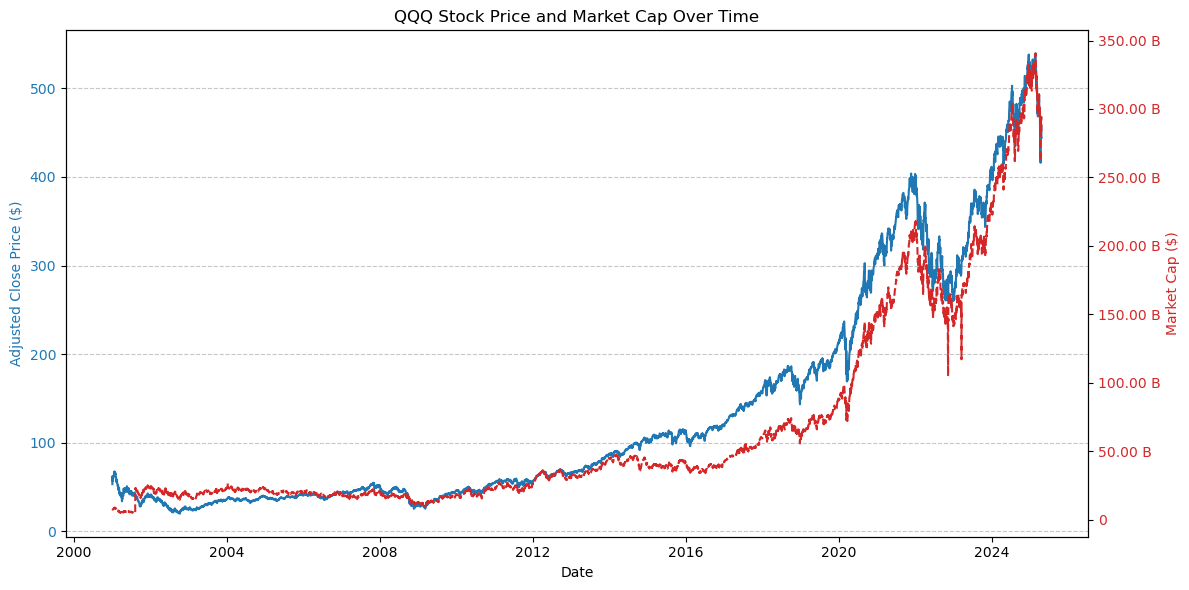

DataFrame head with Market Cap:
  ticker       date  open_price  high_price  low_price  close_price  \
0    QQQ 2025-04-17      447.17      447.75     441.36        444.1   
1    QQQ 2025-04-16      449.03      452.62     437.76       444.18   
2    QQQ 2025-04-15      458.54      462.38     456.15       457.99   
3    QQQ 2025-04-14      464.46      465.05     452.63       457.48   
4    QQQ 2025-04-11      444.65      455.79     441.33        454.4   

   adj_close_price  trading_volume      market_cap  outstanding_shares  \
0            444.1      44714830.0  283624465000.0         638650000.0   
1           444.18      48631080.0  284230782000.0         639900000.0   
2           457.99      34436420.0  294258575000.0         642500000.0   
3           457.48      43583380.0  293313302000.0         641150000.0   
4            454.4      52389590.0  290361600000.0         639000000.0   

   adj_factor  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         1.0  


In [14]:
import matplotlib.ticker as mtick
df = Secruity_daily

fig, ax1 = plt.subplots(figsize=(12, 6))
ticker = df['ticker'].iloc[0] # Get the ticker symbol

# Plot Adjusted Close Price
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Adjusted Close Price ($)', color=color)
ax1.plot(df['date'], df['adj_close_price'], color=color, label='Adjusted Close Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Create a second y-axis for Market Cap
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Market Cap ($)', color=color)
ax2.plot(df['date'], df['market_cap'], color=color, linestyle='--', label='Market Cap')
ax2.tick_params(axis='y', labelcolor=color)

# Format Market Cap axis to be more readable (e.g., in billions or trillions)
def format_market_cap(value, pos):
    if value >= 1e12:
        return f'{value/1e12:.2f} T'
    elif value >= 1e9:
        return f'{value/1e9:.2f} B'
    elif value >= 1e6:
        return f'{value/1e6:.2f} M'
    else:
        return f'{value:.0f}'

ax2.yaxis.set_major_formatter(mtick.FuncFormatter(format_market_cap))

# Add title and legend
plt.title(f'{ticker} Stock Price and Market Cap Over Time')
fig.tight_layout() # Adjust layout to prevent overlap
# Add combined legend (optional, can be tricky with twin axes)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left') # Combine legends if desired

# Display the plot
plt.show()

# %% [markdown]
# ## Display Dataframe Head and Tail with Market Cap

# %%
print("DataFrame head with Market Cap:")
print(df.head())
print("\nDataFrame tail with Market Cap:")
print(df.tail())


In [4]:
#db.create_table('security_daily', Secruity_daily)
#db.show_tables()
#db.read_table('security_daily')

,ticker,datadate,trading_volume,close_price,high_price,low_price,open_price,outstanding_shares
0,ZM,2025-04-15,1916910.0,72.40,73.1300,71.7850,71.965,2.627540e+08
1,SNOW,2025-04-15,2380513.0,146.54,147.2000,144.2000,144.710,3.341000e+08
2,QCOM,2025-04-15,6324074.0,138.60,140.8350,138.0300,139.460,1.106000e+09
3,AVGO,2025-04-15,16883740.0,178.95,182.2644,178.0800,179.725,4.701949e+09
4,AMZN,2025-04-15,43204810.0,179.59,182.3500,177.9331,181.410,1.059773e+10
...,...,...,...,...,...,...,...,...
24880,SHOP,2020-01-02,1390345.0,407.81,408.2400,398.3600,403.990,1.036600e+08
24881,ZM,2020-01-02,1311307.0,68.72,69.2350,68.0200,68.800,1.117950e+08
24882,CRM,2020-01-02,5076763.0,166.99,167.0700,163.5800,163.920,8.870000e+08
24883,MSFT,2020-01-02,22615340.0,160.62,160.7300,158.3300,158.780,7.628806e+09
